k=1, Test Accuracy: 100.00%, CPU Utilization: 40.0%
Training time for k=1: 0.13932394981384277 seconds

k=3, Test Accuracy: 100.00%, CPU Utilization: 22.2%
Training time for k=3: 0.13813996315002441 seconds

k=5, Test Accuracy: 100.00%, CPU Utilization: 14.3%
Training time for k=5: 0.1398634910583496 seconds

k=7, Test Accuracy: 96.67%, CPU Utilization: 17.2%
Training time for k=7: 0.1588737964630127 seconds



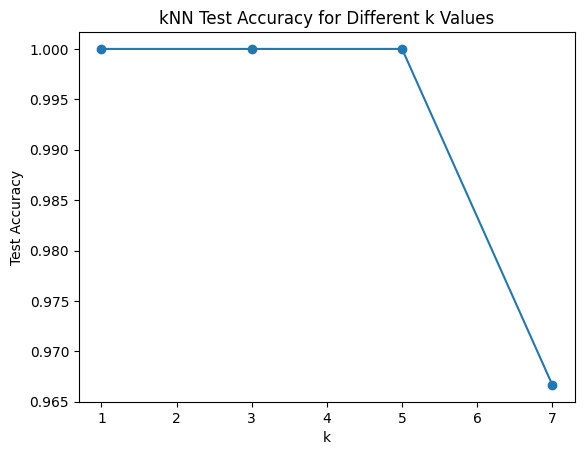

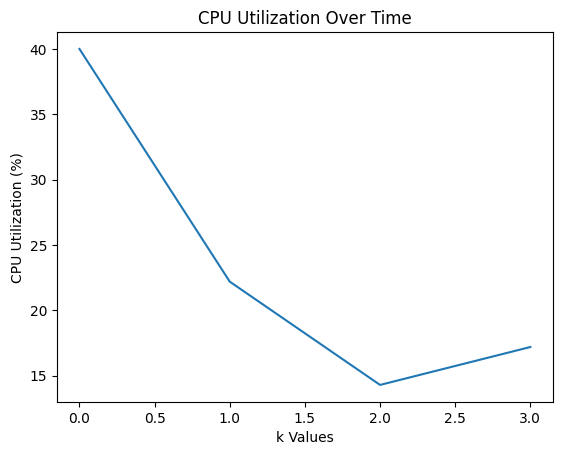

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import psutil
import time

# Function to get CPU utilization
def get_cpu_utilization():
    return psutil.cpu_percent(interval=0.1)

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to calculate Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Function to predict the label using kNN
def predict_knn(X_train, y_train, x_test, k):
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_indices]
    most_common = np.bincount(k_nearest_labels).argmax()
    return most_common

# Function to evaluate kNN on the test set
def evaluate_knn(X_train, y_train, X_test, y_test, k):
    predictions = [predict_knn(X_train, y_train, x_test, k) for x_test in X_test]
    accuracy = np.mean(predictions == y_test)
    return accuracy

# Evaluate kNN with different values of k
k_values = [1, 3, 5, 7]
accuracies = []
cpu_utilization = []

for k in k_values:
    start_time = time.time()

    accuracy = evaluate_knn(X_train, y_train, X_test, y_test, k)
    accuracies.append(accuracy)

    # Log CPU utilization
    cpu = get_cpu_utilization()
    cpu_utilization.append(cpu)

    print(f'k={k}, Test Accuracy: {accuracy * 100:.2f}%, CPU Utilization: {cpu}%')

    elapsed_time = time.time() - start_time
    print(f'Training time for k={k}: {elapsed_time} seconds')
    print()

# Plot results
plt.plot(k_values, accuracies, marker='o')
plt.title('kNN Test Accuracy for Different k Values')
plt.xlabel('k')
plt.ylabel('Test Accuracy')
plt.show()

# Plot CPU utilization over time
plt.plot(cpu_utilization)
plt.title('CPU Utilization Over Time')
plt.xlabel('k Values')
plt.ylabel('CPU Utilization (%)')
plt.show()


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import time
import psutil

# Function to get CPU utilization and memory consumption
def get_system_info():
    cpu_percent = psutil.cpu_percent()
    memory_percent = psutil.virtual_memory().percent
    return cpu_percent, memory_percent

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN implementation
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []
    for x in X_test:
        distances = [euclidean_distance(x, x_train) for x_train in X_train]
        k_neighbors_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_neighbors_indices]
        most_common_label = np.bincount(k_nearest_labels).argmax()
        predictions.append(most_common_label)
    return predictions

# Training with monitoring
start_time = time.time()
cpu_usage_log = []
memory_usage_log = []

for epoch in range(10):  # You can adjust the number of training epochs
    cpu_percent, memory_percent = get_system_info()
    cpu_usage_log.append(cpu_percent)
    memory_usage_log.append(memory_percent)

    # Make predictions
    y_pred = knn_predict(X_train, y_train, X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Epoch {epoch + 1}: Accuracy: {accuracy}")
    print(f"   CPU Utilization: {cpu_percent}%")
    print(f"   Memory Consumption: {memory_percent}%")

end_time = time.time()
training_time = end_time - start_time

# Calculate overall CPU utilization and memory consumption
overall_cpu_utilization = np.mean(cpu_usage_log)
overall_memory_utilization = np.mean(memory_usage_log)
print(f"Overall CPU Utilization: {overall_cpu_utilization}%")
print(f"Overall Memory Utilization: {overall_memory_utilization}%")

# Print training time
print(f"Total Training Time: {training_time} seconds")


Epoch 1: Accuracy: 1.0
   CPU Utilization: 67.3%
   Memory Consumption: 50.8%
Epoch 2: Accuracy: 1.0
   CPU Utilization: 50.0%
   Memory Consumption: 50.8%
Epoch 3: Accuracy: 1.0
   CPU Utilization: 58.3%
   Memory Consumption: 50.8%
Epoch 4: Accuracy: 1.0
   CPU Utilization: 75.0%
   Memory Consumption: 50.8%
Epoch 5: Accuracy: 1.0
   CPU Utilization: 60.0%
   Memory Consumption: 50.8%
Epoch 6: Accuracy: 1.0
   CPU Utilization: 40.0%
   Memory Consumption: 50.8%
Epoch 7: Accuracy: 1.0
   CPU Utilization: 50.0%
   Memory Consumption: 50.8%
Epoch 8: Accuracy: 1.0
   CPU Utilization: 50.0%
   Memory Consumption: 50.8%
Epoch 9: Accuracy: 1.0
   CPU Utilization: 91.7%
   Memory Consumption: 50.7%
Epoch 10: Accuracy: 1.0
   CPU Utilization: 75.0%
   Memory Consumption: 50.7%
Overall CPU Utilization: 61.730000000000004%
Overall Memory Utilization: 50.779999999999994%
Total Training Time: 0.4297361373901367 seconds


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import time
import psutil

# Function to get CPU utilization and memory consumption
def get_system_info():
    cpu_percent = psutil.cpu_percent()
    memory_percent = psutil.virtual_memory().percent
    return cpu_percent, memory_percent

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN implementation
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []
    for x in X_test:
        distances = [euclidean_distance(x, x_train) for x_train in X_train]
        k_neighbors_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_neighbors_indices]
        most_common_label = np.bincount(k_nearest_labels).argmax()
        predictions.append(most_common_label)
    return predictions

# Training with monitoring
start_time = time.time()
cpu_usage_log = []
memory_usage_log = []

for epoch in range(10):  # You can adjust the number of training epochs
    cpu_percent, memory_percent = get_system_info()
    cpu_usage_log.append(cpu_percent)
    memory_usage_log.append(memory_percent)

    # Make predictions
    y_pred = knn_predict(X_train, y_train, X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Epoch {epoch + 1}: Accuracy: {accuracy}")
    print(f"   CPU Utilization: {cpu_percent}%")
    print(f"   Memory Consumption: {memory_percent}%")

end_time = time.time()
training_time = end_time - start_time

# Calculate overall CPU utilization and memory consumption
overall_cpu_utilization = np.mean(cpu_usage_log)
overall_memory_utilization = np.mean(memory_usage_log)
print(f"Overall CPU Utilization: {overall_cpu_utilization}%")
print(f"Overall Memory Utilization: {overall_memory_utilization}%")

# Print training time
print(f"Total Training Time: {training_time} seconds")


Epoch 1: Accuracy: 1.0
   CPU Utilization: 33.9%
   Memory Consumption: 48.5%
Epoch 2: Accuracy: 1.0
   CPU Utilization: 91.7%
   Memory Consumption: 48.5%
Epoch 3: Accuracy: 1.0
   CPU Utilization: 83.3%
   Memory Consumption: 48.6%
Epoch 4: Accuracy: 1.0
   CPU Utilization: 58.3%
   Memory Consumption: 48.6%
Epoch 5: Accuracy: 1.0
   CPU Utilization: 54.5%
   Memory Consumption: 48.6%
Epoch 6: Accuracy: 1.0
   CPU Utilization: 44.4%
   Memory Consumption: 48.6%
Epoch 7: Accuracy: 1.0
   CPU Utilization: 83.3%
   Memory Consumption: 48.7%
Epoch 8: Accuracy: 1.0
   CPU Utilization: 100.0%
   Memory Consumption: 48.8%
Epoch 9: Accuracy: 1.0
   CPU Utilization: 91.7%
   Memory Consumption: 48.8%
Epoch 10: Accuracy: 1.0
   CPU Utilization: 75.0%
   Memory Consumption: 48.9%
Overall CPU Utilization: 71.61000000000001%
Overall Memory Utilization: 48.66%
Total Training Time: 0.47070932388305664 seconds


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import time
import psutil

# Function to get CPU utilization and memory consumption
def get_system_info():
    cpu_percent = psutil.cpu_percent()
    memory_percent = psutil.virtual_memory().percent
    return cpu_percent, memory_percent

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN implementation
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []
    for x in X_test:
        distances = [euclidean_distance(x, x_train) for x_train in X_train]
        k_neighbors_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_neighbors_indices]
        most_common_label = np.bincount(k_nearest_labels).argmax()
        predictions.append(most_common_label)
    return predictions

# Training with monitoring
start_time = time.time()
cpu_usage_log = []
memory_usage_log = []

for epoch in range(10):  # You can adjust the number of training epochs
    cpu_percent, memory_percent = get_system_info()
    cpu_usage_log.append(cpu_percent)
    memory_usage_log.append(memory_percent)

    # Make predictions
    y_pred = knn_predict(X_train, y_train, X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Epoch {epoch + 1}: Accuracy: {accuracy}")
    print(f"   CPU Utilization: {cpu_percent}%")
    print(f"   Memory Consumption: {memory_percent}%")

end_time = time.time()
training_time = end_time - start_time

# Calculate overall CPU utilization and memory consumption
overall_cpu_utilization = np.mean(cpu_usage_log)
overall_memory_utilization = np.mean(memory_usage_log)
print(f"Overall CPU Utilization: {overall_cpu_utilization}%")
print(f"Overall Memory Utilization: {overall_memory_utilization}%")

# Print training time
print(f"Total Training Time: {training_time} seconds")


Epoch 1: Accuracy: 1.0
   CPU Utilization: 37.4%
   Memory Consumption: 48.0%
Epoch 2: Accuracy: 1.0
   CPU Utilization: 91.7%
   Memory Consumption: 48.0%
Epoch 3: Accuracy: 1.0
   CPU Utilization: 75.0%
   Memory Consumption: 48.0%
Epoch 4: Accuracy: 1.0
   CPU Utilization: 50.0%
   Memory Consumption: 48.0%
Epoch 5: Accuracy: 1.0
   CPU Utilization: 75.0%
   Memory Consumption: 48.2%
Epoch 6: Accuracy: 1.0
   CPU Utilization: 83.3%
   Memory Consumption: 48.2%
Epoch 7: Accuracy: 1.0
   CPU Utilization: 84.6%
   Memory Consumption: 48.2%
Epoch 8: Accuracy: 1.0
   CPU Utilization: 83.3%
   Memory Consumption: 48.1%
Epoch 9: Accuracy: 1.0
   CPU Utilization: 58.3%
   Memory Consumption: 48.1%
Epoch 10: Accuracy: 1.0
   CPU Utilization: 50.0%
   Memory Consumption: 48.1%
Overall CPU Utilization: 68.85999999999999%
Overall Memory Utilization: 48.09000000000001%
Total Training Time: 0.4497225284576416 seconds


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import time
import psutil

# Function to get CPU utilization and memory consumption
def get_system_info():
    cpu_percent = psutil.cpu_percent()
    memory_percent = psutil.virtual_memory().percent
    return cpu_percent, memory_percent

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN implementation
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []
    for x in X_test:
        distances = [euclidean_distance(x, x_train) for x_train in X_train]
        k_neighbors_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_neighbors_indices]
        most_common_label = np.bincount(k_nearest_labels).argmax()
        predictions.append(most_common_label)
    return predictions

# Training with monitoring
start_time = time.time()
cpu_usage_log = []
memory_usage_log = []

for epoch in range(10):  # You can adjust the number of training epochs
    cpu_percent, memory_percent = get_system_info()
    cpu_usage_log.append(cpu_percent)
    memory_usage_log.append(memory_percent)

    # Make predictions
    y_pred = knn_predict(X_train, y_train, X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Epoch {epoch + 1}: Accuracy: {accuracy}")
    print(f"   CPU Utilization: {cpu_percent}%")
    print(f"   Memory Consumption: {memory_percent}%")

end_time = time.time()
training_time = end_time - start_time

# Calculate overall CPU utilization and memory consumption
overall_cpu_utilization = np.mean(cpu_usage_log)
overall_memory_utilization = np.mean(memory_usage_log)
print(f"Overall CPU Utilization: {overall_cpu_utilization}%")
print(f"Overall Memory Utilization: {overall_memory_utilization}%")

# Print training time
print(f"Total Training Time: {training_time} seconds")


Epoch 1: Accuracy: 1.0
   CPU Utilization: 36.3%
   Memory Consumption: 48.0%
Epoch 2: Accuracy: 1.0
   CPU Utilization: 91.7%
   Memory Consumption: 47.9%
Epoch 3: Accuracy: 1.0
   CPU Utilization: 50.0%
   Memory Consumption: 47.9%
Epoch 4: Accuracy: 1.0
   CPU Utilization: 66.7%
   Memory Consumption: 47.9%
Epoch 5: Accuracy: 1.0
   CPU Utilization: 58.3%
   Memory Consumption: 47.9%
Epoch 6: Accuracy: 1.0
   CPU Utilization: 50.0%
   Memory Consumption: 47.9%
Epoch 7: Accuracy: 1.0
   CPU Utilization: 50.0%
   Memory Consumption: 47.9%
Epoch 8: Accuracy: 1.0
   CPU Utilization: 50.0%
   Memory Consumption: 47.9%
Epoch 9: Accuracy: 1.0
   CPU Utilization: 66.7%
   Memory Consumption: 48.1%
Epoch 10: Accuracy: 1.0
   CPU Utilization: 75.0%
   Memory Consumption: 48.0%
Overall CPU Utilization: 59.470000000000006%
Overall Memory Utilization: 47.94%
Total Training Time: 0.43073439598083496 seconds


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import time
import psutil

# Function to get CPU utilization and memory consumption
def get_system_info():
    cpu_percent = psutil.cpu_percent()
    memory_percent = psutil.virtual_memory().percent
    return cpu_percent, memory_percent

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN implementation
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []
    for x in X_test:
        distances = [euclidean_distance(x, x_train) for x_train in X_train]
        k_neighbors_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_neighbors_indices]
        most_common_label = np.bincount(k_nearest_labels).argmax()
        predictions.append(most_common_label)
    return predictions

# Training with monitoring
start_time = time.time()
cpu_usage_log = []
memory_usage_log = []

for epoch in range(10):  # You can adjust the number of training epochs
    cpu_percent, memory_percent = get_system_info()
    cpu_usage_log.append(cpu_percent)
    memory_usage_log.append(memory_percent)

    # Make predictions
    y_pred = knn_predict(X_train, y_train, X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Epoch {epoch + 1}: Accuracy: {accuracy}")
    print(f"   CPU Utilization: {cpu_percent}%")
    print(f"   Memory Consumption: {memory_percent}%")

end_time = time.time()
training_time = end_time - start_time

# Calculate overall CPU utilization and memory consumption
overall_cpu_utilization = np.mean(cpu_usage_log)
overall_memory_utilization = np.mean(memory_usage_log)
print(f"Overall CPU Utilization: {overall_cpu_utilization}%")
print(f"Overall Memory Utilization: {overall_memory_utilization}%")

# Print training time
print(f"Total Training Time: {training_time} seconds")


Epoch 1: Accuracy: 1.0
   CPU Utilization: 35.4%
   Memory Consumption: 46.5%
Epoch 2: Accuracy: 1.0
   CPU Utilization: 91.7%
   Memory Consumption: 46.5%
Epoch 3: Accuracy: 1.0
   CPU Utilization: 75.0%
   Memory Consumption: 46.6%
Epoch 4: Accuracy: 1.0
   CPU Utilization: 58.3%
   Memory Consumption: 46.6%
Epoch 5: Accuracy: 1.0
   CPU Utilization: 75.0%
   Memory Consumption: 46.6%
Epoch 6: Accuracy: 1.0
   CPU Utilization: 91.7%
   Memory Consumption: 46.6%
Epoch 7: Accuracy: 1.0
   CPU Utilization: 50.0%
   Memory Consumption: 46.6%
Epoch 8: Accuracy: 1.0
   CPU Utilization: 75.0%
   Memory Consumption: 46.6%
Epoch 9: Accuracy: 1.0
   CPU Utilization: 66.7%
   Memory Consumption: 46.6%
Epoch 10: Accuracy: 1.0
   CPU Utilization: 75.0%
   Memory Consumption: 46.6%
Overall CPU Utilization: 69.38%
Overall Memory Utilization: 46.580000000000005%
Total Training Time: 0.4357309341430664 seconds


# Average Calculation of Time

In [1]:
def calculate_average_time(times):
    if not times:
        return 0  # Avoid division by zero if the list is empty
    total_seconds = sum(time.total_seconds() for time in times)
    average_seconds = total_seconds / len(times)
    average_time = timedelta(seconds=average_seconds)
    return average_time

In [12]:
from datetime import timedelta

time_values = [timedelta( seconds=0.20 ),
               timedelta( seconds=0.21     ),
               timedelta( seconds=0.21  ),
               timedelta( seconds=0.20    ),
               timedelta( seconds=0.17     )]

average_time = calculate_average_time(time_values)
print(f"Average Time: {average_time}")

Average Time: 0:00:00.198000


# Average Percentage Calculations of Memory and Cpu utilization:

In [4]:
def calculate_average_percentage(percentages):
    if not percentages:
        return 0  # Avoid division by zero if the list is empty
    total_percentage = sum(percentages)
    average_percentage = total_percentage / len(percentages)
    return average_percentage

In [20]:
percentage_values = [3.9,4.9,5.2,6.8,6.3]

average_percentage = calculate_average_percentage(percentage_values)
print(f"Average Percentage of Cpu utilization: {average_percentage}%")

Average Percentage of Cpu utilization: 5.42%


In [6]:
percentage_values = [3.5,3.7,3.7,3.7,3.7]

average_percentage = calculate_average_percentage(percentage_values)
print(f"Average Percentage of Memory Utilization: {average_percentage}%")

Average Percentage of Memory Utilization: 3.66%


# Conversion Of Percentage Value to normal Value

In [32]:
def percentage_to_normal(percentage):
    
    normal_value = percentage / 100.0
    return normal_value

# Example usage:
percentage_value = 2.02
normal_value = percentage_to_normal(percentage_value)

print(f"{percentage_value}% is equivalent to {normal_value} as a normal value.")

2.02% is equivalent to 0.0202 as a normal value.


In [33]:
Power=((1-0.0202 )*243)+(0.0202*(847))
Power

255.2008

In [34]:
Energy=28.08*255.2008
Energy

7166.038463999999

In [17]:
# Make predictions
y_pred = knn_predict(X_train, y_train, X_test)

# Evaluate accuracy on testing set
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Epoch {epoch + 1}: Testing Accuracy: {accuracy:.2f}%")

Epoch 10: Testing Accuracy: 100.00%
